In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Traffic.zip

Streaming output truncated to the last 5000 lines.
  inflating: archive/Train/14/00014_00021_00023.png  
  inflating: __MACOSX/archive/Train/14/._00014_00021_00023.png  
  inflating: archive/Train/14/00014_00012_00025.png  
  inflating: __MACOSX/archive/Train/14/._00014_00012_00025.png  
  inflating: archive/Train/14/00014_00003_00002.png  
  inflating: __MACOSX/archive/Train/14/._00014_00003_00002.png  
  inflating: archive/Train/14/00014_00003_00016.png  
  inflating: __MACOSX/archive/Train/14/._00014_00003_00016.png  
  inflating: archive/Train/14/00014_00012_00019.png  
  inflating: __MACOSX/archive/Train/14/._00014_00012_00019.png  
  inflating: archive/Train/14/00014_00012_00018.png  
  inflating: __MACOSX/archive/Train/14/._00014_00012_00018.png  
  inflating: archive/Train/14/00014_00003_00017.png  
  inflating: __MACOSX/archive/Train/14/._00014_00003_00017.png  
  inflating: archive/Train/14/00014_00012_00024.png  
  inflating: __MACOSX/archive/Train/14/._00014_00012_00024.png

In [ ]:
!pip install tensorflow keras sklearn matplotlib pandas pil


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [ ]:
os.getcwd()

'/content'

In [ ]:
cd/content/archive/Train


/content/archive/Train


In [ ]:
os.getcwd()

'/content/archive/Train'

In [ ]:
# Loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j

        # Load image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Resize the image
        img = cv2.resize(img, (30, 30), interpolation=cv2.INTER_NEAREST)

        # Normalize the image
        img = img / 255.0

        # Append the image data and corresponding label
        data.append(img)
        labels.append(i)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)


In [ ]:
print(data.shape, labels.shape)
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(39209, 30, 30) (39209,)
(31367, 30, 30) (7842, 30, 30) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [ ]:
train_data=pd.read_csv('/content/archive/Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('/content/archive/Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()




,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [ ]:
test_data.head()



,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [ ]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [ ]:
cd/content/archive

/content/archive


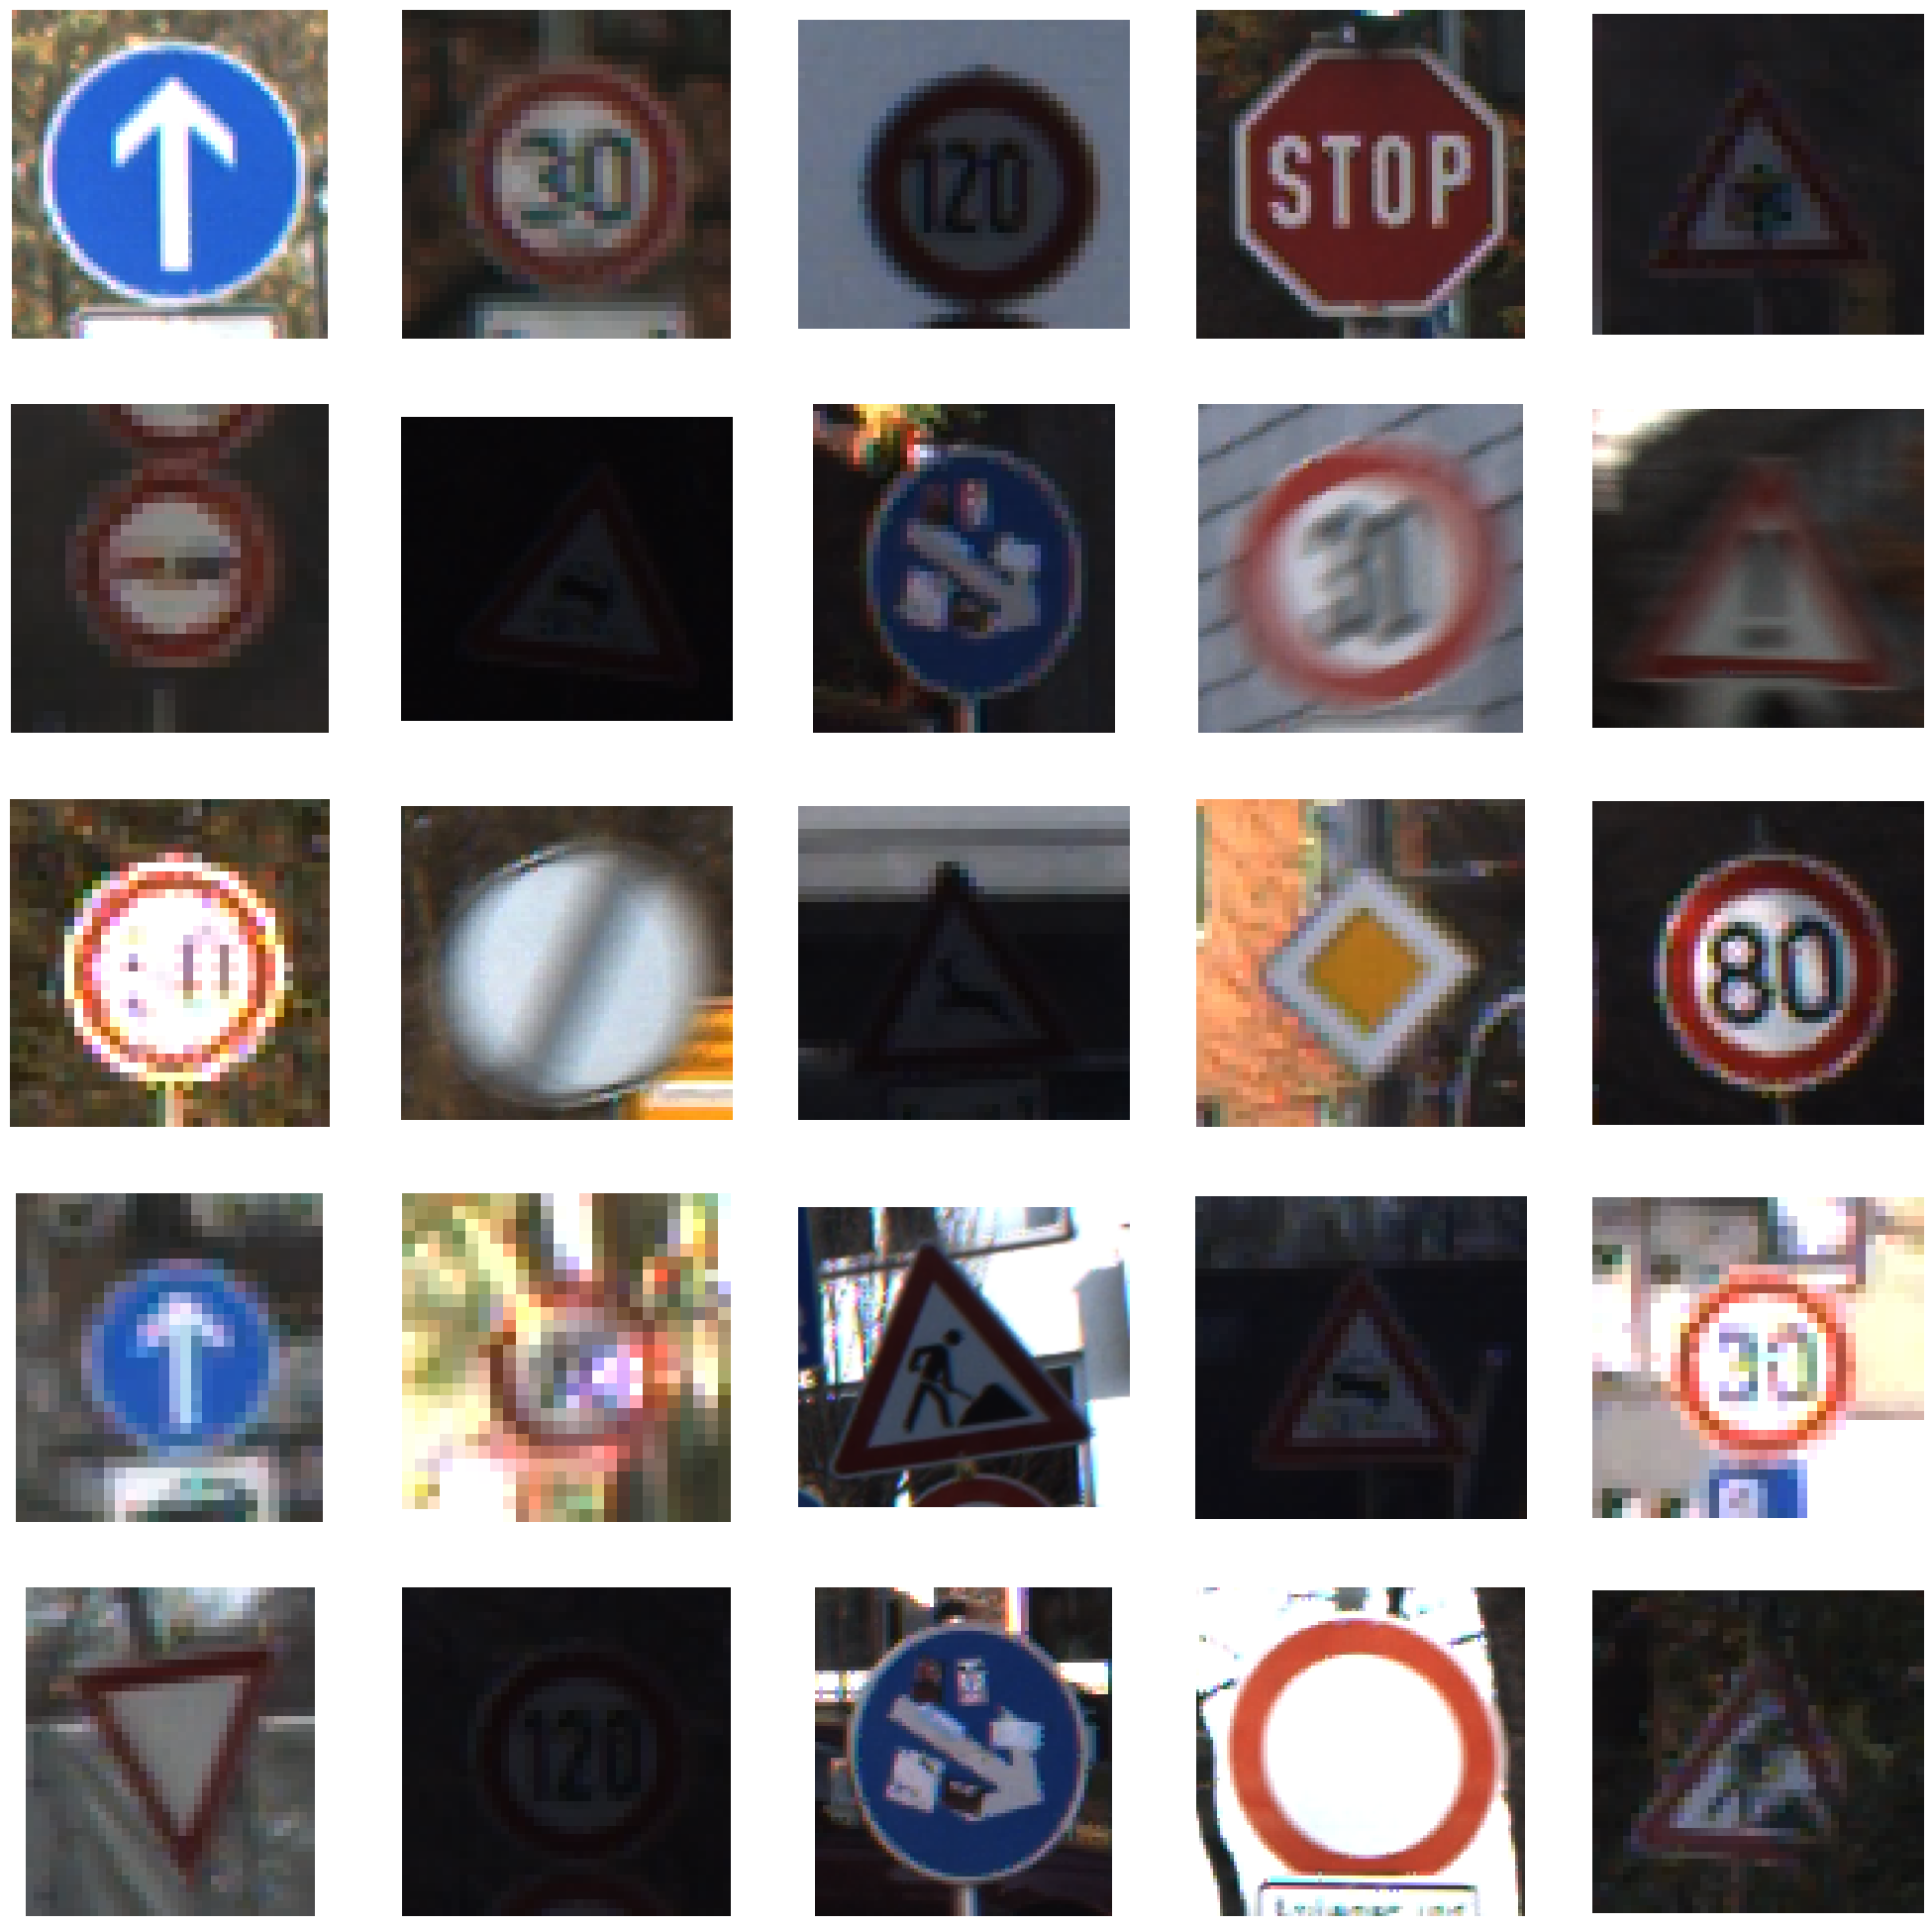

In [ ]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)




In [ ]:
cd/content/archive/Train

/content/archive/Train


Text(0, 0.5, 'Number of images')

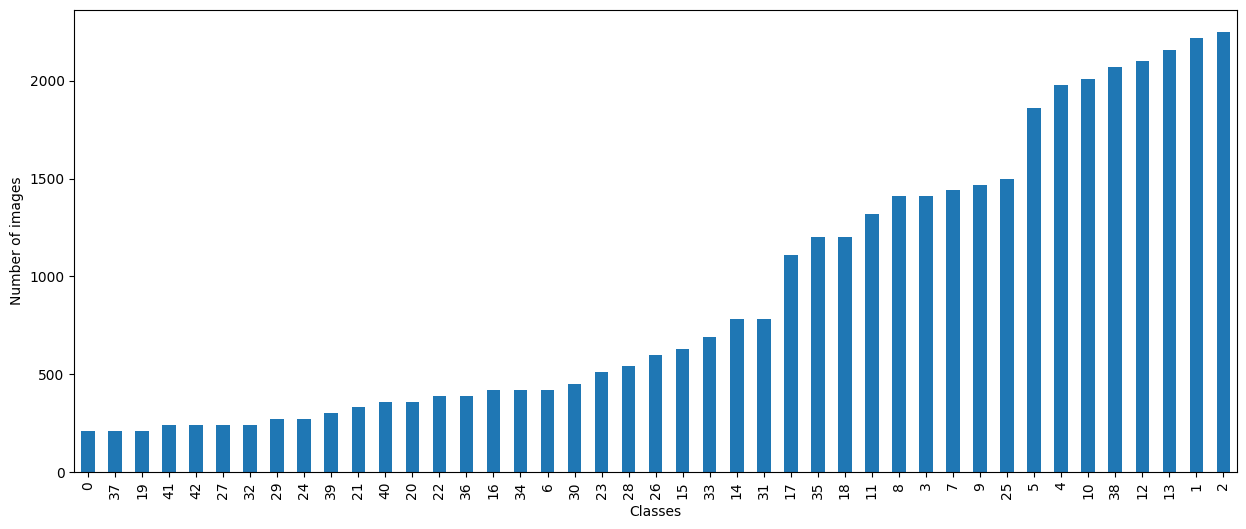

In [ ]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization

# Building the model
model = Sequential()

# First Layer with Batch Normalization
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(30, 30, 1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(rate=0.25))

# Second Layer with Batch Normalization
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(rate=0.25))

# Additional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(rate=0.25))

# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │              

 Total params: 692,619 (2.64 MB)

 Trainable params: 691,979 (2.64 MB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
!pip install visualkeras
import visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 15.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


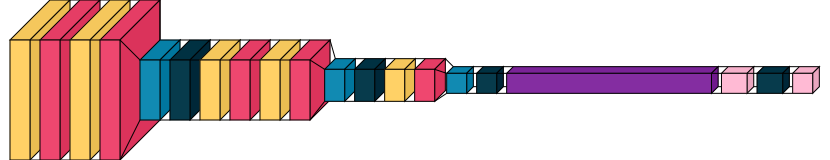

In [ ]:
visualkeras.layered_view(model)

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9882 - loss: 0.0414 - val_accuracy: 0.9939 - val_loss: 0.0312
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9890 - loss: 0.0470 - val_accuracy: 0.9949 - val_loss: 0.0210
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9869 - loss: 0.0507 - val_accuracy: 0.9932 - val_loss: 0.0307
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9864 - loss: 0.0550 - val_accuracy: 0.9943 - val_loss: 0.0243
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9858 - loss: 0.0542 - val_accuracy: 0.9934 - val_loss: 0.0312
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9879 - loss: 0.0463 - val_accuracy: 0.9957 - val_loss: 0.0214
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9904 - loss: 0.0352 - val_accuracy: 0.9941 - val_loss: 0.0273
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9911 - loss: 0.0328 - val_accuracy

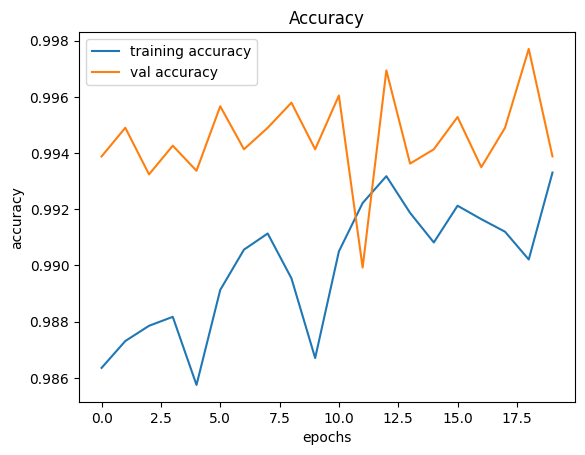

In [ ]:
#plotting graphs for accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

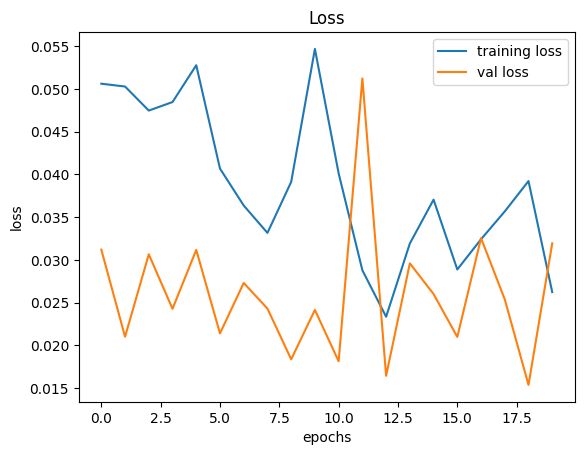

In [ ]:

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.031935591250658035
Test accuracy 0.9938791394233704


In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
!cd /content
model.save('traffic_classifier.h5')

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


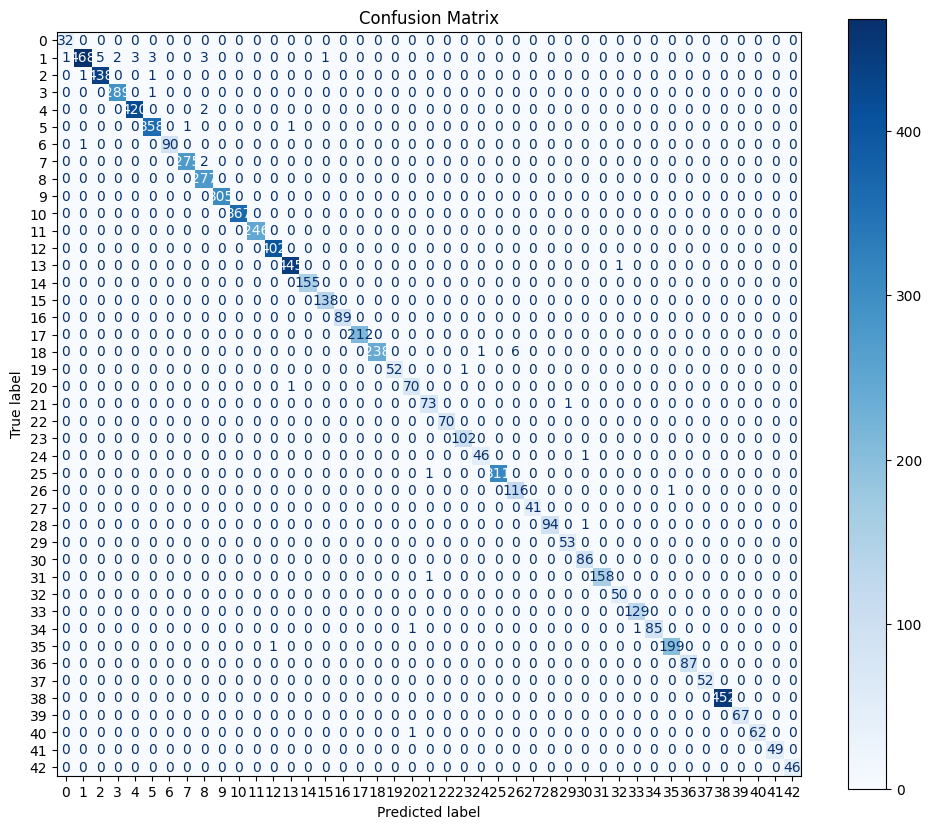

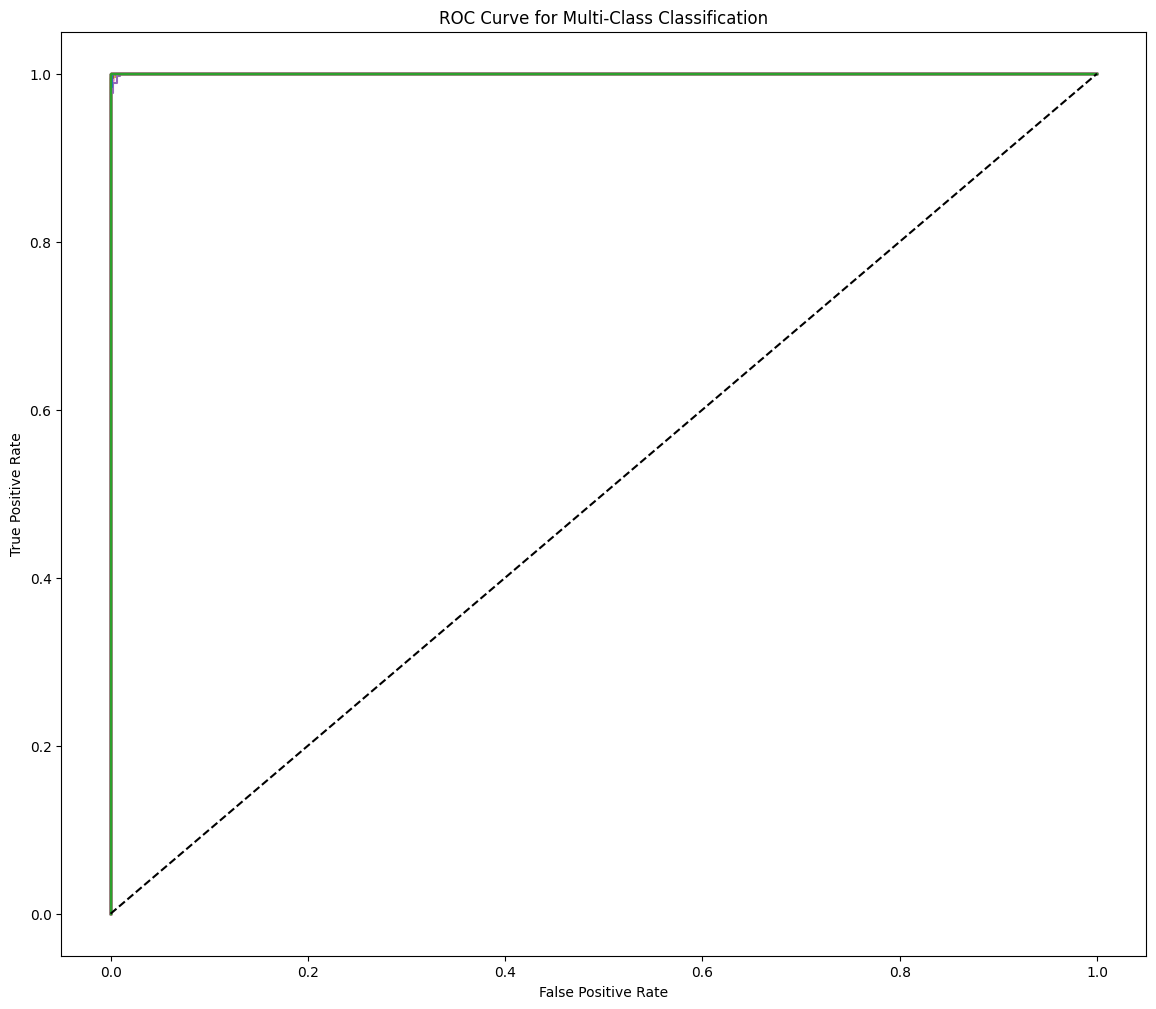

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming model has been defined and trained
# Example prediction after model has been trained
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust figure size for the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC Calculation
# Binarize the output for ROC curve (one-hot encoding, if not already)
y_test_bin = label_binarize(y_true_classes, classes=np.arange(43))
y_pred_bin = y_pred

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(43):  # Assuming 43 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(14, 12))  # Adjust figure size for ROC curve
for i in range(43):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')

plt.show()
